In [25]:
#import statements
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import math
from mpl_toolkits.mplot3d import Axes3D

# Image Formation:

In [26]:
#make all of the initial points as numpy arrays:
x1 = np.array([-1, -0.5, 2, 1])
x2 = np.array([1, -0.5, 2, 1])
x3 = np.array([1, 0.5, 2, 1])
x4 = np.array([-1, 0.5, 2, 1])
p = [x1, x2, x3, x4]


In [27]:
#rigid body transformation:
def rb_transform(extrinsic, intrinsic, points):
    
    #transform each point: new_X = K[R|t]x
    new_points = []
    for point in points:
        intermediate = np.matmul(intrinsic, extrinsic)
        
        new_points.append(np.matrix.tolist((np.matmul(intermediate, point)))[0])
    
    return new_points

In [28]:
def plot_square(verts, x_min, x_max, y_min, y_max):
	codes = [Path.MOVETO, Path.LINETO, Path.LINETO, Path.LINETO, Path.CLOSEPOLY]
	path = Path(verts, codes)
	fig = plt.figure()
	ax = fig.add_subplot(111)
	patch = patches.PathPatch(path, facecolor='none', lw=2)
	ax.add_patch(patch)
	ax.set_xlim(x_min, x_max)
	ax.set_ylim(y_min, y_max)
	plt.show()

In [29]:
#1: No rigid body transformation, focal length = 1
rt1 = np.matrix([[1, 0, 0, 0], \
                [0, 1, 0, 0], \
                [0, 0, 1, 0]])

k1 = np.matrix([[1, 0, 0], \
              [0, 1, 0], \
              [0, 0, 1]])

In [30]:
#try function, here goes nothin
p2 = rb_transform(rt1,k1,p)
print(p2)

[[-1.0, -0.5, 2.0], [1.0, -0.5, 2.0], [1.0, 0.5, 2.0], [-1.0, 0.5, 2.0]]


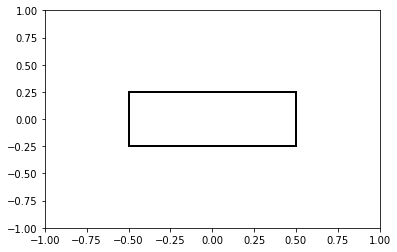

In [31]:
def plot_points(out, xm, xx, ym, yx):
    v = []
    for point in out:
        po = [point[0]/point[2],point[1]/point[2]]
        v.append(po)
    v.append([0,0])
    plot_square(v, xm,xx,ym,yx)
plot_points(p2,-1,1,-1,1)

In [32]:
#2.2: Translation, Focal length = 1. t = (0, 0, 2)
#1: No rigid body transformation, focal length = 1
rt2 = np.matrix([[1, 0, 0, 0], \
                [0, 1, 0, 0], \
                [0, 0, 1, 2]])

k2 = np.matrix([[1, 0, 0], \
              [0, 1, 0], \
              [0, 0, 1]])

#call function
p3 = rb_transform(rt2,k2,p)

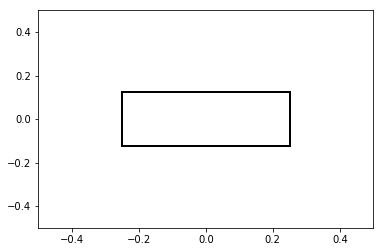

[[-1.0, -0.5, 4.0], [1.0, -0.5, 4.0], [1.0, 0.5, 4.0], [-1.0, 0.5, 4.0]]


In [33]:
plot_points(p3,-0.5,0.5,-0.5,0.5)
print(p3)

In [34]:
#2.3: Rotate 60 degrees about z axis, then 45 degrees about x axis
theta1 = math.radians(45)
theta2 = math.radians(60)
rx = np.matrix([[1, 0, 0], [0, math.cos(theta1), -math.sin(theta1)], [0, math.sin(theta1), math.cos(theta1)]])
rz = np.matrix([[math.cos(theta2), -math.sin(theta2), 0], [math.sin(theta2), math.cos(theta2), 0], [0, 0, 1]])
rotate = np.matmul(rz,rx)


#append t to newly rotated matrix: t = [0,0,2]

rt3 = np.matrix([[rotate[0,0],rotate[0,1],rotate[0,2],0], \
                 [rotate[1,0],rotate[1,1],rotate[1,2],0], \
                 [rotate[2,0],rotate[2,1],rotate[2,2],2]])

#use the same K as the previous two problems:
p4 = rb_transform(rt3, k2, p)


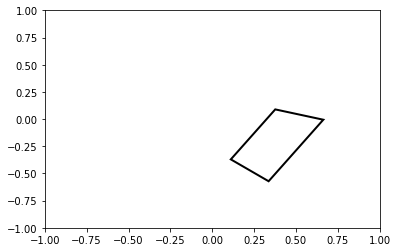

[[ 0.5        -0.61237244  0.61237244  0.        ]
 [ 0.8660254   0.35355339 -0.35355339  0.        ]
 [ 0.          0.70710678  0.70710678  2.        ]]

[[1.030931089239486, -1.7499088802676233, 3.0606601717798214], [2.0309310892394863, -0.017858072698745897, 3.0606601717798214], [1.4185586535436916, 0.33569531789452794, 3.767766952966369], [0.41855865354369154, -1.3963554896743493, 3.767766952966369]]


In [35]:
plot_points(p4,-1,1,-1,1)
print(rt3)
print()
print(p4)

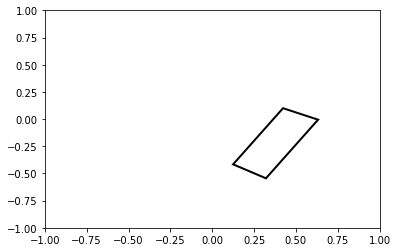

[[  0.5         -0.61237244   0.61237244   0.        ]
 [  0.8660254    0.35355339  -0.35355339   0.        ]
 [  0.           0.70710678   0.70710678  15.        ]]


In [36]:
#2.4 Rotate 60 degrees about z, 45 about x, focal length 5 
# t = [0,0,15]

k4 = np.matrix([[5,0,0], \
                [0,5,0], \
                [0,0,1]])

#we can use the same rotated matrix as before, but we need to append a different t
rt4 = np.matrix([[rotate[0,0],rotate[0,1],rotate[0,2],0], \
                 [rotate[1,0],rotate[1,1],rotate[1,2],0], \
                 [rotate[2,0],rotate[2,1],rotate[2,2],15]])

p5 = rb_transform(rt4, k4, p)
plot_points(p5,-1,1,-1,1)
print(rt4)

# Rendering

In [37]:
# Load facedata.npy as ndarray
face_data = np.load('facedata.npy',encoding='latin1')

# Load albedo matrix 
albedo = face_data.item().get('albedo')

# Load uniform albedo matrix
uniform_albedo = face_data.item().get('uniform_albedo')

# Load heightmap 
heightmap = face_data.item().get('heightmap')

# Load light source
light_source = face_data.item().get('lightsource')

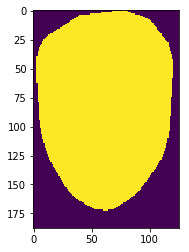

In [38]:
#show albedo maps:
plt.imshow(uniform_albedo)

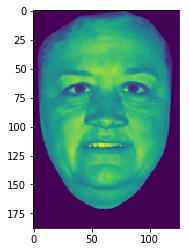

In [39]:
plt.imshow(albedo)

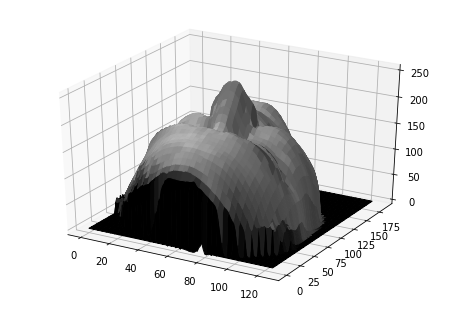

In [40]:
fig1 = plt.figure()
ax1 = Axes3D(fig1)
X = [i for i in range(0,126)]
Y = [i for i in range(0,188)]
X, Y = np.meshgrid(X, Y)
alb_str = albedo.astype(np.str)
Axes3D.plot_surface(ax1, X, Y, heightmap, facecolors=alb_str)

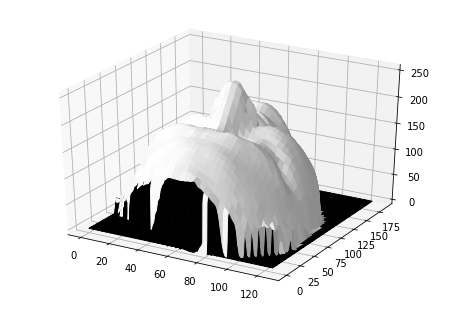

In [41]:
fig2 = plt.figure()
ax2 = Axes3D(fig2)
alb_str = uniform_albedo.astype(np.str)
Axes3D.plot_surface(ax2, X, Y, heightmap, facecolors=alb_str)

In [42]:
x_vectors = []
y_vectors = []
#go through the heightmap:
for x in range(len(heightmap)):
    
    x_normals = []
    y_normals = []
    
    for y in range(len(heightmap[x])):
        
        #compute normal in the x direction
        if x > 0 and x < len(heightmap)-1:
            x_normals.append((heightmap[x+1][y] - heightmap[x-1][y])/2)
        
        #lower bound edge
        elif x == 0: 
            x_normals.append((-3*heightmap[x][y] + 4*heightmap[x+1][y] - heightmap[x+2][y])/2)
        
        #upper bound edge
        else:
            x_normals.append((-3*heightmap[x][y] + 4*heightmap[x-1][y] - heightmap[x-2][y])/2)

        #compute normal in y direction  
        if y > 0 and y < len(heightmap[x])-1:
            y_normals.append((heightmap[x][y+1] - heightmap[x][y-1])/2)
        
        #lower bound edge
        elif y == 0:
            y_normals.append((-3*heightmap[x][y] + 4*heightmap[x][y+1] - heightmap[x][y+2])/2)
        
        #upper bound edge
        else:
            y_normals.append((-3*heightmap[x][y] + 4*heightmap[x][y-1] - heightmap[x][y-2])/2)
    
    x_vectors.append(x_normals)
    y_vectors.append(y_normals)




In [43]:
def normalize():
    normal_vectors = []
    x_bois = []
    y_bois = []
    z_bois = []
    for i in range(len(x_vectors)):
        item = []
        xitem = []
        yitem = []
        zitem = []
        for j in range(len(x_vectors[i])):
            vec = [-x_vectors[i][j], -y_vectors[i][j], 1]
            quot = np.sqrt(vec[0]**2 + vec[1]**2 + vec[2]**2)
            nvec = [(v / quot) for v in vec]
            item.append(nvec)
            xitem.append(nvec[0])
            yitem.append(nvec[1])
            zitem.append(nvec[2])
        normal_vectors.append(item)
        x_bois.append(xitem)
        y_bois.append(yitem)
        z_bois.append(zitem)
    return normal_vectors, x_bois, y_bois, z_bois


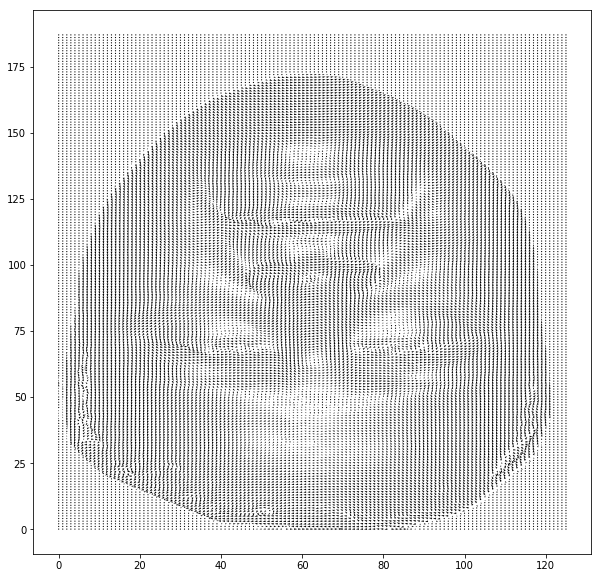

In [44]:
my_norms, x_, y_, z_ = normalize()
plt.figure(figsize=(10,10))
q = plt.quiver(X,Y, x_, y_, units='width')
plt.show()

In [21]:
#actually render the image:
def render(norm, alb, light):
    
    #initialize output image
    image = []
    
    #loop through albedo
    for x in range(len(alb)):
        row = []
        for y in range(len(alb[x])):
        
            shat = [x-light[0], y-light[1], heightmap[x][y]-light[2]]
            dist = np.sqrt(shat[0]**2 + shat[1]**2 + shat[2]**2)
            s_hat = [shat[0]/dist, shat[1]/dist, shat[2]/dist]
            row.append(alb[x][y]*np.dot(norm[x][y],s_hat)*(1/dist**2))
        
        image.append(row)
    
    return image

In [22]:
def combine_image(im1,im2):
    im_out = []
    for i in range(len(im1)):
        wot = []
        for j in range(len(im1[i])):
            wot.append(im1[i][j] + im2[i][j])
        im_out.append(wot)
    return im_out

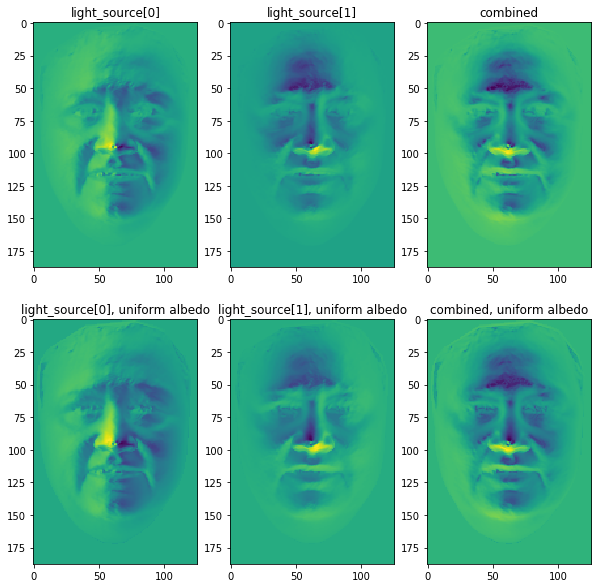

In [23]:
#albedo
img1 = render(my_norms, albedo, light_source[0])
img2 = render(my_norms, albedo, light_source[1])
img3 = combine_image(img1,img2)

#uniform albedo:
img4 = render(my_norms, uniform_albedo, light_source[0])
img5 = render(my_norms, uniform_albedo, light_source[1])
img6 = combine_image(img4,img5)

#plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(231)
ax1.set_title("light_source[0]")
ax2 = fig.add_subplot(232)
ax2.set_title("light_source[1]")
ax3 = fig.add_subplot(233)
ax3.set_title("combined")
ax4 = fig.add_subplot(234)
ax4.set_title("light_source[0], uniform albedo")
ax5 = fig.add_subplot(235)
ax5.set_title("light_source[1], uniform albedo")
ax6 = fig.add_subplot(236)
ax6.set_title("combined, uniform albedo")


ax1.imshow(img1)
ax2.imshow(img2)
ax3.imshow(img3)
ax4.imshow(img4)
ax5.imshow(img5)
ax6.imshow(img6)
                      
plt.show()

In [24]:
img2 = render(my_norms, albedo, l)

NameError: name 'l' is not defined